# K-近邻算法（KNN）

K nearest neighbour

## 0、导引

### 如何进行电影分类
众所周知，电影可以按照题材分类，然而题材本身是如何定义的?由谁来判定某部电影属于哪
个题材?也就是说同一题材的电影具有哪些公共特征?这些都是在进行电影分类时必须要考虑的问
题。没有哪个电影人会说自己制作的电影和以前的某部电影类似，但我们确实知道每部电影在风格
上的确有可能会和同题材的电影相近。那么动作片具有哪些共有特征，使得动作片之间非常类似，
而与爱情片存在着明显的差别呢？动作片中也会存在接吻镜头，爱情片中也会存在打斗场景，我们
不能单纯依靠是否存在打斗或者亲吻来判断影片的类型。但是爱情片中的亲吻镜头更多，动作片中
的打斗场景也更频繁，基于此类场景在某部电影中出现的次数可以用来进行电影分类。

本章介绍第一个机器学习算法：K-近邻算法，它非常有效而且易于掌握。

## 1、k-近邻算法原理

简单地说，K-近邻算法采用测量不同特征值之间的距离方法进行分类。

- 优点：精度高、对异常值不敏感、无数据输入假定。
- 缺点：时间复杂度高、空间复杂度高。
- 适用数据范围：数值型和标称型。

### 工作原理

存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据
与所属分类的对应关系。输人没有标签的新数据后，将新数据的每个特征与样本集中数据对应的
特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们
只选择样本数据集中前K个最相似的数据，这就是K-近邻算法中K的出处,通常*K是不大于20的整数。
最后 ，选择K个最相似数据中出现次数最多的分类，作为新数据的分类*。

回到前面电影分类的例子，使用K-近邻算法分类爱情片和动作片。有人曾经统计过很多电影的打斗镜头和接吻镜头，下图显示了6部电影的打斗和接吻次数。假如有一部未看过的电影，如何确定它是爱情片还是动作片呢？我们可以使用K-近邻算法来解决这个问题。

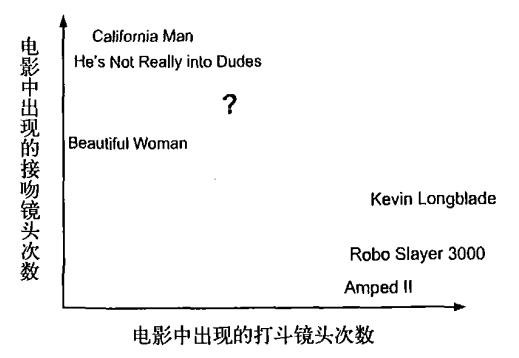

首先我们需要知道这个未知电影存在多少个打斗镜头和接吻镜头，上图中问号位置是该未知电影出现的镜头数图形化展示，具体数字参见下表。

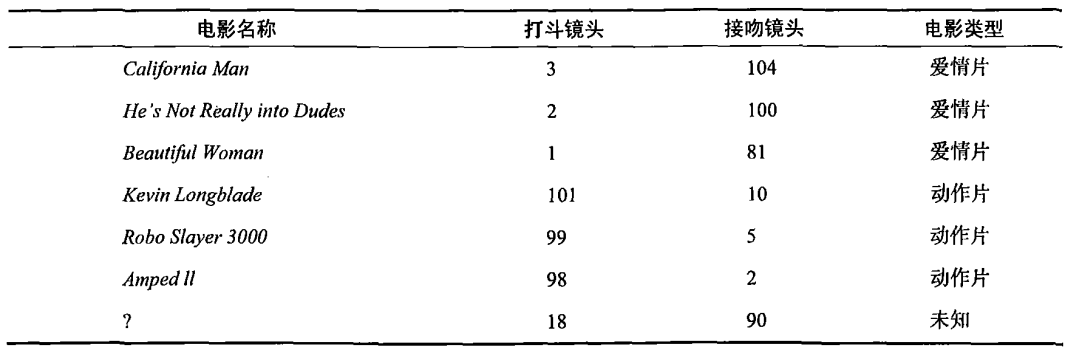

即使不知道未知电影属于哪种类型，我们也可以通过某种方法计算出来。首先计算未知电影与样本集中其他电影的距离，如图所示。

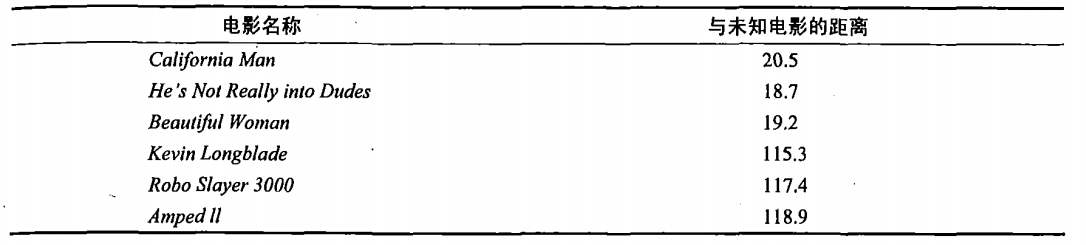

现在我们得到了样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到K个距
离最近的电影。假定k=3，则三个最靠近的电影依次是California Man、He's Not Really into Dudes、Beautiful Woman。K-近邻算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。

### 欧几里得距离(Euclidean Distance)

欧氏距离是最常见的距离度量，衡量的是多维空间中各个点之间的绝对距离。公式如下：

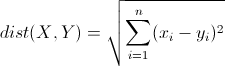

## 2、在scikit-learn库中使用k-近邻算法

- 分类问题：from sklearn.neighbors import KNeighborsClassifier

- 回归问题：from sklearn.neighbors import KNeighborsRegressor

In [71]:
# sklearn 机器学习库，Google支持，python编写
# 包含大部分算法， 基础的库
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [8]:
movie = pd.read_excel('../data/movies.xlsx',sheet_name=1)
# 样本均衡！！！，动作片：爱情片 = 1:1
movie

电影名称  武打镜头  接吻镜头 分类情况
0   大话西游    36     1  动作片
1    杀破狼    43     2  动作片
2    前任3     0    10  爱情片
3    战狼2    59     1  动作片
4  泰坦尼克号     1    15  爱情片
5   星语心愿     2    19  爱情片

In [11]:
X = movie.iloc[:,1:3]
Y = movie['分类情况']
# X是Dataframe  Y 是Series
display(X,Y)

武打镜头  接吻镜头
0    36     1
1    43     2
2     0    10
3    59     1
4     1    15
5     2    19

0    动作片
1    动作片
2    爱情片
3    动作片
4    爱情片
5    爱情片
Name: 分类情况, dtype: object

In [23]:
# n_neighbors邻居的数量，不能大于样本的数量
# 通常选出来几个关键性数据，就可以进行划分
knn = KNeighborsClassifier(n_neighbors=5,weights='distance')
# 训练
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
X.shape

(6, 2)

In [25]:
# 预测
# 算法要训练或预测的数据，必须是二维的
# [[样本1],[样本2],...，[样本n]]
# y_test = np.array(['碟中谍6','前任攻略'])
X_test = np.array([[80,2],[2,20]])

knn.predict(X_test)

array(['动作片', '爱情片'], dtype=object)

### 0）一个最简单的例子

身高、体重、鞋子尺码数据对应性别

### 1）用于分类

导包，机器学习的算法KNN、数据蓝蝴蝶


In [26]:
from sklearn import datasets

In [29]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [30]:
X = iris['data']

y = iris['target']

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
index = np.arange(150)
index

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [33]:
# 打乱顺序
np.random.shuffle(index)

In [34]:
index

array([ 12,  97, 125, 121,  48, 148,  75, 137, 139, 107,  54, 117,   4,
       103,  72,  99,   5,  27,  70,  16,  34,  15, 100,  74, 101,  76,
       134, 122,   2, 102,   3,  49,  84, 120, 111, 131,  66,   6,  46,
        38, 104,  33,  62,   9,  35, 112,  30, 145, 124,  36,  52,  53,
       143,  58,  22,  23,  96,  77, 116,  93,  51, 119, 105,  88, 123,
        61,  44, 132, 133, 136, 147,  20, 113,  25,  19,  55,  67,  95,
       126,  85,  45,  78,  69,  87, 135,  63,  92, 108, 106,  65, 130,
        28,  10,  71, 141,  94,  80, 149, 129,  14,  91, 110,  90,  39,
        40,  50,  11,  59, 118,  24,  82,  42,  18, 144,  68,  73, 128,
        98,  21,  32, 127,  17,  37,  56,  89,  81, 115,  83,   7,  47,
        41,  60,  57, 146,  43,  79,   0,  13, 142,  64,   1,  31,   8,
        29,  26, 138,  86, 140, 114, 109])

In [35]:
# X,y从iris字典中取得
# X—— y  一一对应
# 按照相同的规则将顺序打乱，所以打乱后依然是一一对应
X = X[index]
y = y[index]

In [37]:
y

array([0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 0,
       0, 2, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 2, 0, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 0,
       1, 0, 0, 2, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1,
       1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2])

获取训练样本

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X[:120],y[:120])

# 算法根据数据预测出的类别
y_ = knn.predict(X[-30:])
y_

array([2, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 2, 1, 2, 2, 2])

In [39]:
y[-30:]

array([2, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 2, 1, 2, 2, 2])

In [43]:
y_ == y[-30:]

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [42]:
(y_ == y[-30:]).sum()/30.0

0.9666666666666667

In [60]:
knn = KNeighborsClassifier(n_neighbors=5,weights='distance')

knn.fit(X[:120],y[:120])

# 算法根据数据预测出的类别
y_ = knn.predict(X[-30:])
# (y_ == y[-30:]).sum()/30.0

knn.score(X[-30:],y[-30:])

0.9666666666666667

In [64]:
knn = KNeighborsClassifier(n_neighbors=9,weights='distance')

knn.fit(X[30:],y[30:])

# 算法准确率
knn.score(X[:30],y[:30])

0.9333333333333333

In [68]:
scores = []
for i in range(100):
    np.random.shuffle(index)
    X = X[index]
    y = y[index]
    
    knn = KNeighborsClassifier(n_neighbors=9,weights='distance')

    knn.fit(X[30:],y[30:])

# 算法准确率
    score_ = knn.score(X[:30],y[:30])
    
    scores.append(score_)

In [69]:
np.mean(scores)

0.9643333333333334

绘制图形

定义KNN分类器

第一步，训练数据

第二步预测数据：，所预测的数据，自己创造，就是上面所显示图片的背景点  

生成预测数据

对数据进行预测

显示数据

### 2）用于回归  
回归用于对趋势的预测

导包

生成样本数据

生成测试数据的结果

第一步：生成模型，并训练数据

第二步：使用模型，预测数据

绘图显示数据

### 练习
人类动作识别  
步行，上楼，下楼，坐着，站立和躺着  
![](stand-sit-run.jpg)  
数据采集每个人在腰部穿着智能手机，进行了六个活动（步行，上楼，下楼，坐着，站立和躺着）。采用嵌入式加速度计和陀螺仪，以50Hz的恒定速度捕获3轴线性加速度和3轴角速度，来获取数据

导入数据

In [79]:
x_train = np.load('./x_train.npy')
y_train = np.load('./y_train.npy')
x_test = np.load('./x_test.npy')
y_test = np.load('./y_test.npy')

In [90]:
display(x_test,y_test)

array([[ 0.25717778, -0.02328523, -0.01465376, ..., -0.72000927,
         0.27680104, -0.0579783 ],
       [ 0.28602671, -0.01316336, -0.11908252, ..., -0.69809082,
         0.28134292, -0.08389801],
       [ 0.27548482, -0.02605042, -0.11815167, ..., -0.70277146,
         0.28008303, -0.0793462 ],
       ...,
       [ 0.34996609,  0.03007744, -0.11578796, ..., -0.65535684,
         0.27447878,  0.18118355],
       [ 0.23759383,  0.01846687, -0.09649893, ..., -0.65971859,
         0.26478161,  0.18756291],
       [ 0.15362719, -0.01843651, -0.13701846, ..., -0.66008023,
         0.26393619,  0.1881034 ]])

array([5, 5, 5, ..., 2, 2, 2], dtype=int64)

In [76]:
display(x_train.shape,y_train.shape)

(7352, 561)

(7352,)

In [85]:
display(x_test.shape,y_test.shape)

(2947, 561)

(2947,)

In [78]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform')
knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [81]:
knn.score(x_test,y_test)

0.9015948422124194

获取数据

In [92]:
s = plt.imread('./stand-sit-run.jpg')
s.shape

(290, 400, 3)

In [96]:
# plt.figure(figsize=(10*1,10*1.5))
# for i in range(100):
    
#     axes = plt.subplot(10,10,i+1)
# #     X_test 750ge
# #   数据还原
#     axes.imshow(X_test[i].reshape(561,3))
# #     目标值y_test
#     t = Y_test[i]
# #    算法预测数据
#     p = Y_[i]
#     axes.set_title('True:%d\nPredict:%d' % (t,p))

绘制

## 3、作业

#### 1、预测年收入是否大于50K美元

读取adult.txt文件，最后一列是年收入，并使用KNN算法训练模型，然后使用模型预测一个人的年收入是否大于50

获取年龄、教育程度、职位、每周工作时间作为机器学习数据  
获取薪水作为对应结果

数据转换，将String类型数据转换为int

【知识点】map方法，进行数据转换

切片：训练数据和预测数据

生成算法

第一步：训练数据

第二步：预测数据

保存训练模型  
from sklearn.externals import joblib

#### 2、小麦种类预测

读取seeds.tsv文件，最后一列是小麦品种，其他列是小麦特征

#### 3、改进约会网站的匹配效果

读取datingTestSet.txt文件，最后一列是喜欢程度。模型：根据前几列的信息，预测喜欢程度